In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
from functools import reduce
import pickle
import os

root_dir = Path(os.path.abspath("__file__")).parent
pickle_dir = root_dir / "pickle"

with open(pickle_dir / 'atoms.pickle', 'rb') as f:
    atoms = pickle.load(f)

with open(pickle_dir / 'nonatoms_decomposed.pickle', 'rb') as f:
    nonatoms_decomposed = pickle.load(f)

In [2]:
unique_atom_set = set([hex(ord(c)) for c in reduce(lambda a, b: a+b, nonatoms_decomposed[:,2])])

In [3]:
atom_set = set(atoms[:,0])

100%|██████████| 88480/88480 [00:01<00:00, 54904.75it/s]


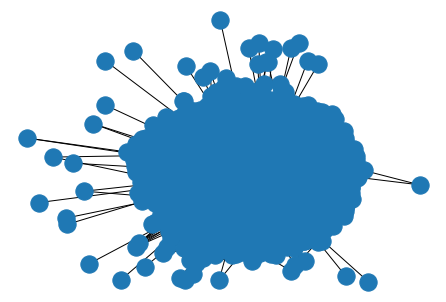

In [4]:
B = nx.Graph()
B.add_nodes_from(nonatoms_decomposed[:,0], bipartite=0)
B.add_nodes_from(unique_atom_set, bipartite=1)

for ids in tqdm(nonatoms_decomposed):
    B.add_edges_from([(ids[0], hex(ord(c))) for c in ids[2]])

nx.draw(B)
plt.show()